# Analisis del dataset

Importamos los módulos necesarios. En el caso de la clase HyperspectralData tenemos que agregar el path a su módulo pues python no lo tiene agregado por defecto.

In [40]:
import numpy as np
import os, sys
sys.path.insert(0, '/home/fabian/DataScience/SemiSupervisedLearning/nips14-ssl')
from hyperspectralData import HyperspectralData
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Data = HyperspectralData()
print("Path a los archivos:", Data.get_path())

Path a los archivos: /home/fabian/DataScience/SemiSupervisedLearning/nips14-ssl/data/Hyperspectral Data/Labeled HSI/


Veamos cuantos archivos hay en el directorio.

In [18]:
n_files = len(Data.get_filenames(100000))
print("Cantidad de archivos:", n_files)
print("Nombre al azar:", os.listdir(Data.get_path())[np.random.randint(low=0, high=n_files)])

Cantidad de archivos: 67
Nombre al azar: ALH1401-28-labeled.hdf5


Pasemos a analizar el primer archivo.

In [58]:
# Definimos una función que printea ciertas estadísticas dado el filename.
def print_statistics(pixels, labels):
    t0 = time.time()
    # Los separamos en los que sí tienen etiqueta y los que no:
    labeled = labels > 0
    unlabeled = labels == 0
    pixels_labeled = pixels[labeled]
    labels_labeled = labels[labeled]
    pixels_unlabeled = pixels[unlabeled]
    labels_unlabeled = labels[unlabeled]
    print("Tiempo de ejecución:", time.time()-t0)
    print("Forma de los datos:", pixels.shape)
    n_datos = pixels_labeled.shape[0] + pixels_unlabeled.shape[0]
    print("Cantidad de datos:", n_datos)
    print("Cantidad de labels:", labels_labeled.shape[0] + labels_unlabeled.shape[0])
    n_labeled = pixels_labeled.shape[0]
    n_unlabeled = pixels_unlabeled.shape[0]
    print("Datos etiquetados:", n_labeled)
    print("Datos no etiquetados:", n_unlabeled)
    print("Hay un", ((0.0 + n_labeled)/n_datos)*100, "% de datos etiquetados.")

In [60]:
filename = Data.get_filenames(1)[0]
pixels, labels = Data.load_pixels_labels_by_filename(filename)
print_statistics(pixels, labels)

Tiempo de ejecución: 0.22103500366210938
Forma de los datos: (2848, 384, 268)
Cantidad de datos: 1093632
Cantidad de labels: 1093632
Datos etiquetados: 52107
Datos no etiquetados: 1041525
Hay un 4.764582601825842 % de datos etiquetados.


Bueno, vemos claramente que la mayoría de los ejemplos no están etiquetados. Veamos, de los etiquetados, cómo distribuyen las etiquetas.

In [66]:
def labels_hist(filename, labels):
    t0 = time.time()
    index_labeled = labels > 0
    labels = labels[index_labeled]
    plt.xlabel('Etiqueta')
    plt.ylabel('Frecuencia')
    plt.title(filename)
    plt.hist(labels)
    plt.show()
    print("Tiempo ejecución:", time.time()-t0)

def show_labels_distribuition(labels):
    # Iteramos sobre todos las posibles etiquetas, desde cero hasta la de mayor valor.
    t0 = time.time()
    labels = labels[labels > 0]
    total = 0
    for label in range(labels.max()+1):
        # Cuantos tienen esa etiqueta:
        n = labels[labels==label].shape[0]
        total += n
        if n!=0:
            print("Etiqueta:", label, "Cantidad: ", n)
    print('')
    print("Cantidad de etiquetas:", total)
    print("Deberían ser:", labels.shape[0])
    print("Tiempo ejecución:", time.time()-t0)

Tiempo de ejecución: 0.22143912315368652
Forma de los datos: (2848, 384, 268)
Cantidad de datos: 1093632
Cantidad de labels: 1093632
Datos etiquetados: 52107
Datos no etiquetados: 1041525
Hay un 4.764582601825842 % de datos etiquetados.



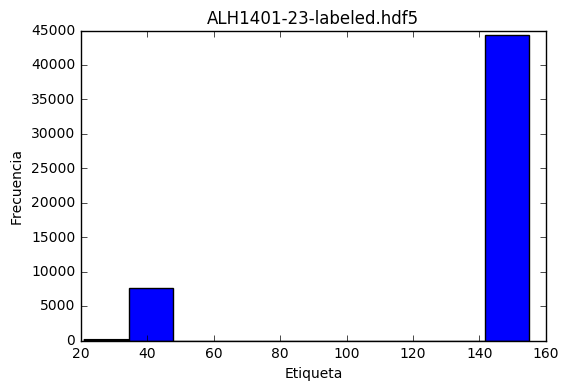

Tiempo ejecución: 0.5112249851226807

Etiqueta: 21 Cantidad:  34
Etiqueta: 32 Cantidad:  92
Etiqueta: 39 Cantidad:  7679
Etiqueta: 151 Cantidad:  15271
Etiqueta: 153 Cantidad:  4711
Etiqueta: 154 Cantidad:  13620
Etiqueta: 155 Cantidad:  10700

Cantidad de etiquetas: 52107
Deberían ser: 52107
Tiempo ejecución: 0.012155532836914062


In [67]:
filename = Data.get_filenames(1)[0]
pixels, labels = Data.load_pixels_labels_by_filename(filename)
print_statistics(pixels, labels)
print('')
labels_hist(filename, labels)
print('')
show_labels_distribuition(labels)

Y aquí entonces vemos el problema que teníamos, nuestro modelo estaba prediciendo sólo 39, lo cual es un poco obvio si es que tenemos que la mayoría (por no decir que casi todos) son 39.

Ahora mostraremos estas mismas estadísticas pero para más archivos.

Nombre archivo: ALH1401-23-labeled.hdf5
Tiempo de ejecución: 0.698082447052002
Forma de los datos: (2848, 384, 268)
Cantidad de datos: 1093632
Cantidad de labels: 1093632
Datos etiquetados: 52107
Datos no etiquetados: 1041525
Hay un 4.764582601825842 % de datos etiquetados.



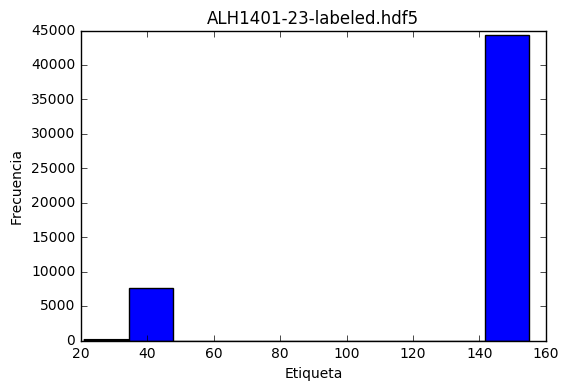

Tiempo ejecución: 2.8800089359283447

Etiqueta: 21 Cantidad:  34
Etiqueta: 32 Cantidad:  92
Etiqueta: 39 Cantidad:  7679
Etiqueta: 151 Cantidad:  15271
Etiqueta: 153 Cantidad:  4711
Etiqueta: 154 Cantidad:  13620
Etiqueta: 155 Cantidad:  10700

Cantidad de etiquetas: 52107
Deberían ser: 52107
Tiempo ejecución: 0.011137723922729492

Tiempo total ejecución: 8.028552532196045
-----------------

Nombre archivo: ALH1602-23-labeled.hdf5
Tiempo de ejecución: 0.3726072311401367
Forma de los datos: (2661, 384, 268)
Cantidad de datos: 1021824
Cantidad de labels: 1021824
Datos etiquetados: 185992
Datos no etiquetados: 835832
Hay un 18.201960415883754 % de datos etiquetados.



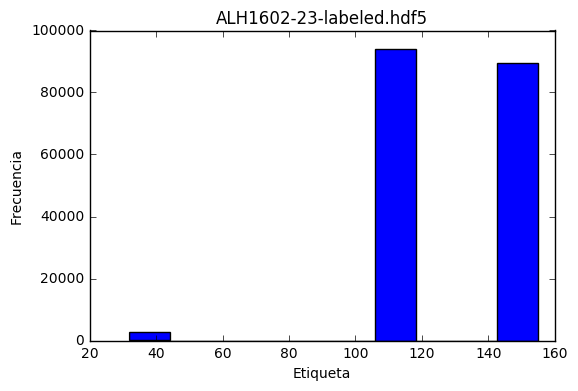

Tiempo ejecución: 0.6342222690582275

Etiqueta: 32 Cantidad:  2586
Etiqueta: 108 Cantidad:  93898
Etiqueta: 151 Cantidad:  15133
Etiqueta: 152 Cantidad:  27141
Etiqueta: 153 Cantidad:  11188
Etiqueta: 154 Cantidad:  22050
Etiqueta: 155 Cantidad:  13996

Cantidad de etiquetas: 185992
Deberían ser: 185992
Tiempo ejecución: 0.03421735763549805

Tiempo total ejecución: 15.938688278198242
-----------------

Nombre archivo: ALH1599-01-labeled.hdf5
Tiempo de ejecución: 0.23954319953918457
Forma de los datos: (2613, 384, 268)
Cantidad de datos: 1003392
Cantidad de labels: 1003392
Datos etiquetados: 115623
Datos no etiquetados: 887769
Hay un 11.523213260619977 % de datos etiquetados.



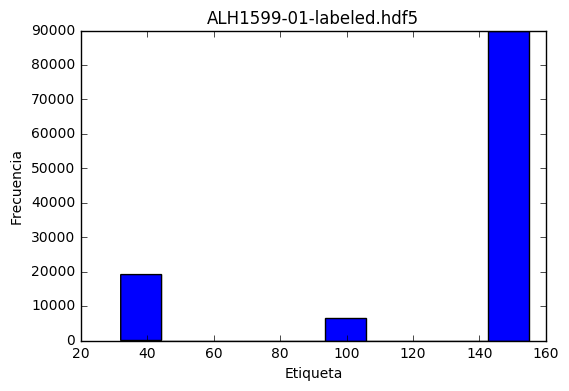

Tiempo ejecución: 0.4353606700897217

Etiqueta: 32 Cantidad:  8081
Etiqueta: 39 Cantidad:  10820
Etiqueta: 40 Cantidad:  237
Etiqueta: 102 Cantidad:  6522
Etiqueta: 151 Cantidad:  16534
Etiqueta: 152 Cantidad:  36865
Etiqueta: 153 Cantidad:  19248
Etiqueta: 154 Cantidad:  11781
Etiqueta: 155 Cantidad:  5535

Cantidad de etiquetas: 115623
Deberían ser: 115623
Tiempo ejecución: 0.02208566665649414

Tiempo total ejecución: 17.32006597518921
-----------------

Nombre archivo: ALH1417-40-labeled.hdf5
Tiempo de ejecución: 0.36653661727905273
Forma de los datos: (2899, 384, 268)
Cantidad de datos: 1113216
Cantidad de labels: 1113216
Datos etiquetados: 83320
Datos no etiquetados: 1029896
Hay un 7.484621133724273 % de datos etiquetados.



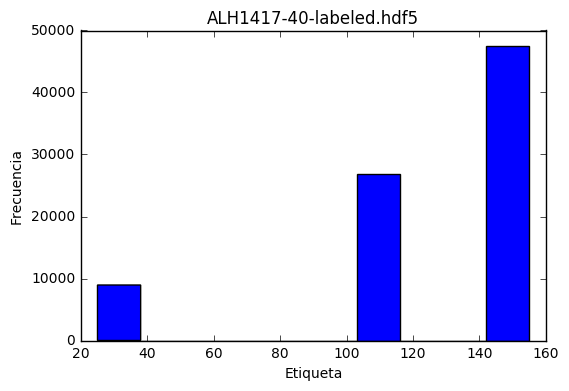

Tiempo ejecución: 1.3033056259155273

Etiqueta: 25 Cantidad:  8951
Etiqueta: 114 Cantidad:  26837
Etiqueta: 151 Cantidad:  16398
Etiqueta: 152 Cantidad:  14654
Etiqueta: 153 Cantidad:  4737
Etiqueta: 154 Cantidad:  6551
Etiqueta: 155 Cantidad:  5192

Cantidad de etiquetas: 83320
Deberían ser: 83320
Tiempo ejecución: 0.02016615867614746

Tiempo total ejecución: 30.762938261032104
-----------------

Nombre archivo: ALH1417-46-labeled.hdf5
Tiempo de ejecución: 0.24054956436157227
Forma de los datos: (2651, 384, 268)
Cantidad de datos: 1017984
Cantidad de labels: 1017984
Datos etiquetados: 184991
Datos no etiquetados: 832993
Hay un 18.17228954482585 % de datos etiquetados.



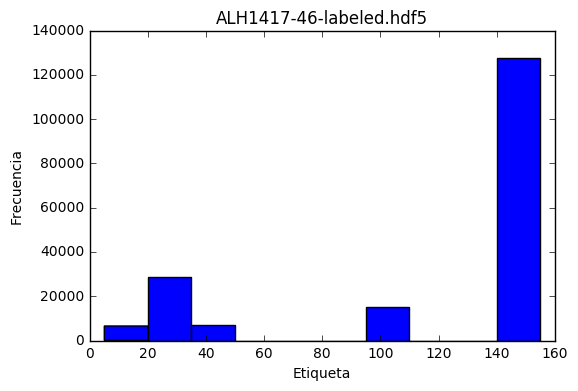

Tiempo ejecución: 0.429384708404541

Etiqueta: 5 Cantidad:  1165
Etiqueta: 12 Cantidad:  5393
Etiqueta: 32 Cantidad:  28685
Etiqueta: 39 Cantidad:  6804
Etiqueta: 40 Cantidad:  187
Etiqueta: 101 Cantidad:  14998
Etiqueta: 151 Cantidad:  15095
Etiqueta: 152 Cantidad:  83896
Etiqueta: 153 Cantidad:  16438
Etiqueta: 154 Cantidad:  6099
Etiqueta: 155 Cantidad:  6231

Cantidad de etiquetas: 184991
Deberían ser: 184991
Tiempo ejecución: 0.03914499282836914

Tiempo total ejecución: 39.38469457626343
-----------------



In [69]:
for filename in Data.get_filenames(5):
    t0 = time.time()
    print("Nombre archivo:", filename)
    pixels, labels = Data.load_pixels_labels_by_filename(filename)
    print_statistics(pixels, labels)
    print('')
    labels_hist(filename, labels)
    print('')
    show_labels_distribuition(labels)
    print('')
    print("Tiempo total ejecución:", time.time()-t0)
    print("-----------------")
    print('')